<a href="https://colab.research.google.com/github/YoloA11000/Metodos-Numericos/blob/main/Comparaci%C3%B3n_de_interpolaci%C3%B3nes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

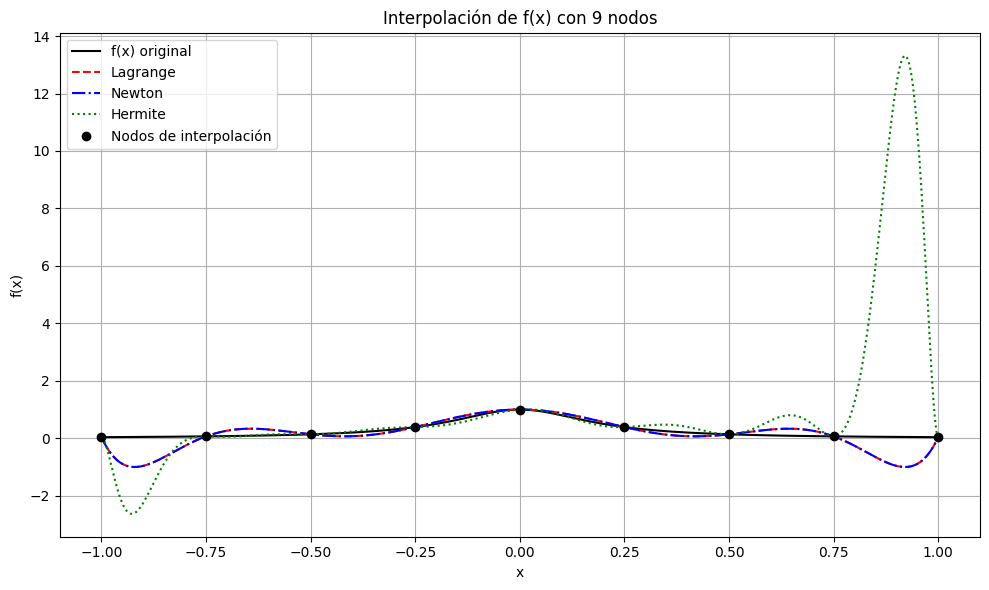

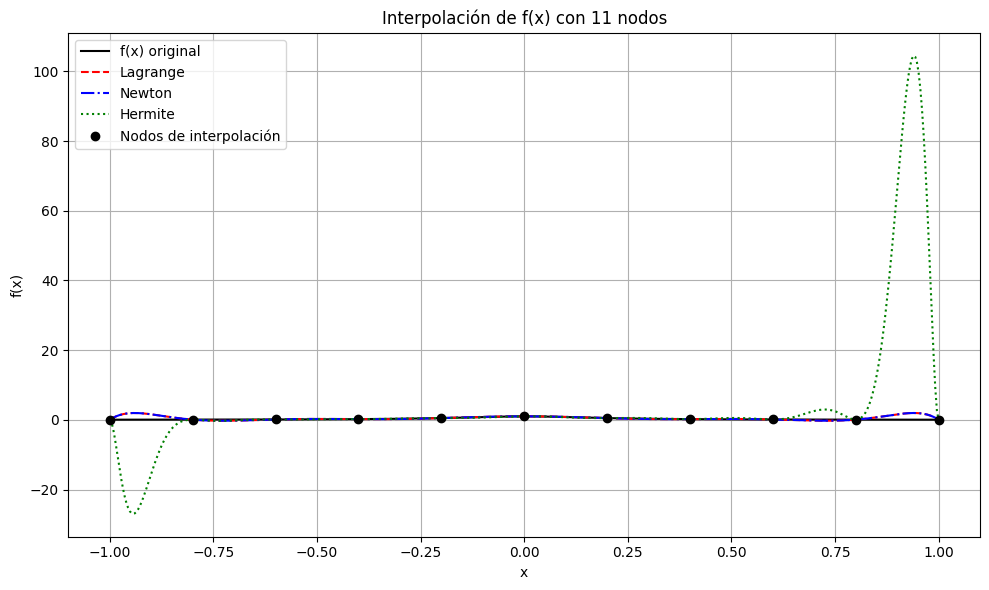

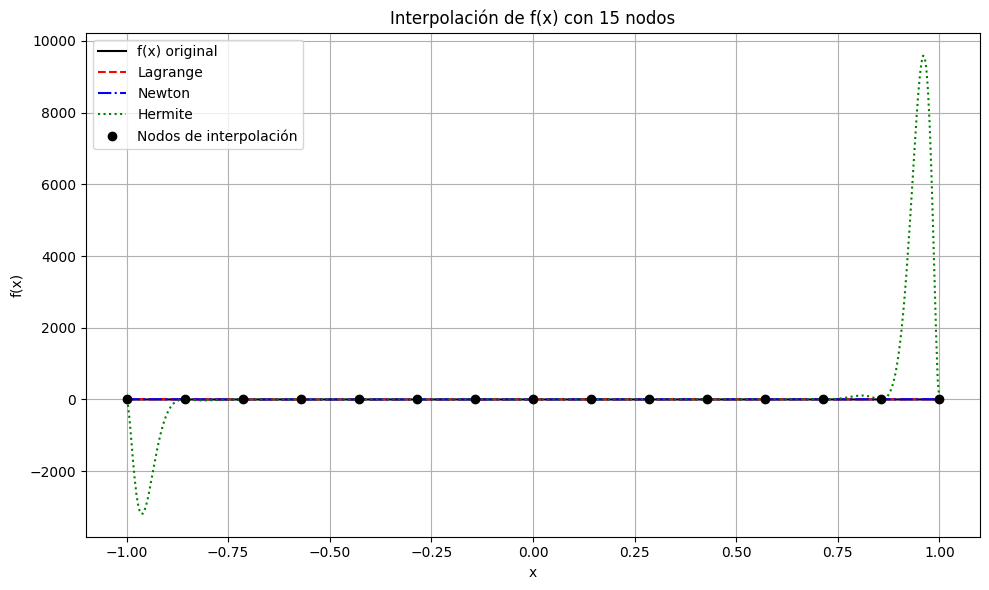

<ipython-input-1-c414e7986614>:33: UserWarning: 42 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  poly_hermite = KroghInterpolator(x_hermite, y_hermite)


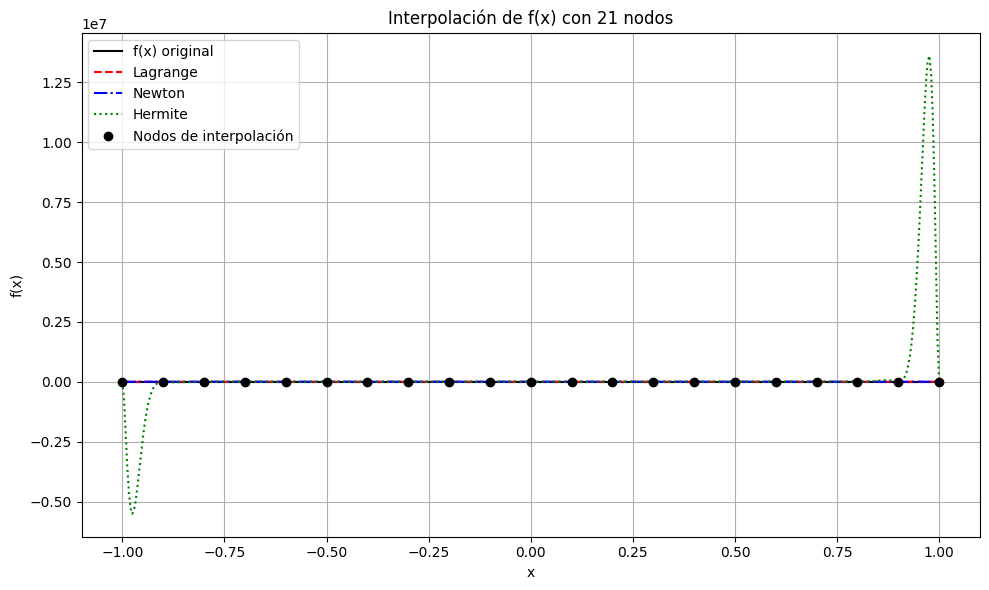

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, KroghInterpolator

# Definimos la función de Runge: f(x) = 1 / (1 + 25x²)
def f(x):
    return 1 / (1 + 25 * x**2)

# Función auxiliar que construye los polinomios y los grafica
def interpolar_y_graficar(n_nodos):
    # Crear 'n_nodos' puntos igualmente espaciados en el intervalo [-1, 1]
    x_nodes = np.linspace(-1, 1, n_nodos)
    y_nodes = f(x_nodes)  # Evaluar la función en esos nodos

    # ---------------------------
    # Polinomio de Lagrange
    # ---------------------------
    poly_lagrange = lagrange(x_nodes, y_nodes)

    # ---------------------------
    # Polinomio de Newton
    # (utilizamos KroghInterpolator que construye un polinomio dividido)
    # ---------------------------
    poly_newton = KroghInterpolator(x_nodes, y_nodes)

    # ---------------------------
    # Polinomio de Hermite
    # Simulamos derivadas duplicando los nodos (sin derivadas reales)
    # ---------------------------
    x_hermite = np.repeat(x_nodes, 2)   # Duplicar cada nodo
    y_hermite = np.repeat(y_nodes, 2)   # Duplicar cada valor
    poly_hermite = KroghInterpolator(x_hermite, y_hermite)

    # ---------------------------
    # Evaluar los polinomios en una malla fina
    # ---------------------------
    x_plot = np.linspace(-1, 1, 500)      # Puntos para graficar
    y_true = f(x_plot)                    # Función original
    y_lagrange = poly_lagrange(x_plot)   # Evaluar Lagrange
    y_newton = poly_newton(x_plot)       # Evaluar Newton
    y_hermite = poly_hermite(x_plot)     # Evaluar Hermite

    # ---------------------------
    # Graficar todos los resultados
    # ---------------------------
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, 'k-', label='f(x) original')
    plt.plot(x_plot, y_lagrange, 'r--', label='Lagrange')
    plt.plot(x_plot, y_newton, 'b-.', label='Newton')
    plt.plot(x_plot, y_hermite, 'g:', label='Hermite')
    plt.plot(x_nodes, y_nodes, 'ko', label='Nodos de interpolación')
    plt.title(f'Interpolación de f(x) con {n_nodos} nodos')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ============================
# PARTE 1: 9 nodos
# ============================
interpolar_y_graficar(9)

# ============================
# PARTE 2: Aumentar el número de nodos
# Para observar el fenómeno de Runge en los extremos
# ============================
for n in [11, 15, 21]:
    interpolar_y_graficar(n)